In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imblearn

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:0101

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## 1 Data processing and exploration
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.1 Examine the class label imbalance
Let's look at the dataset imbalance:

**Q1. How many observations are there in this dataset? How many of them have positive label (labeled as 1)?**

Here, first we will perform some basic steps to understand the dataset. The answer is written later after the determination of frudulemnt class and non-fradulent class (that is 1 and 0)

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
raw_df.shape

(284807, 31)

In [5]:
cols = raw_df.columns.values.tolist()
print(cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
###some basic information of the dataset, also to figure out how many of them are categorical or numerical
## code from my previous notebook (Assignment 1) to check the null values 

##cite : my own homework 2

print("Are there are any null values :", raw_df.isnull().values.any())
print("NaN values features", raw_df.columns[raw_df.isnull().any()].tolist() )
print("Categorical:", list(raw_df.select_dtypes(include=['object']).columns))
print("Numerical:", list(raw_df.select_dtypes(exclude=['object']).columns))
total_null = raw_df.isnull().sum()
unique = raw_df.nunique(axis=0)
percentage = (raw_df.isnull().sum().sort_values(ascending=False)/len(raw_df))*100
out = pd.concat([total_null,percentage, unique],axis=1, keys=["total_null","percentage","unique"])
out

Are there are any null values : False
NaN values features []
Categorical: []
Numerical: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,total_null,percentage,unique
Time,0,0.0,124592
V1,0,0.0,275663
V2,0,0.0,275663
V3,0,0.0,275663
V4,0,0.0,275663
V5,0,0.0,275663
V6,0,0.0,275663
V7,0,0.0,275663
V8,0,0.0,275663
V9,0,0.0,275663


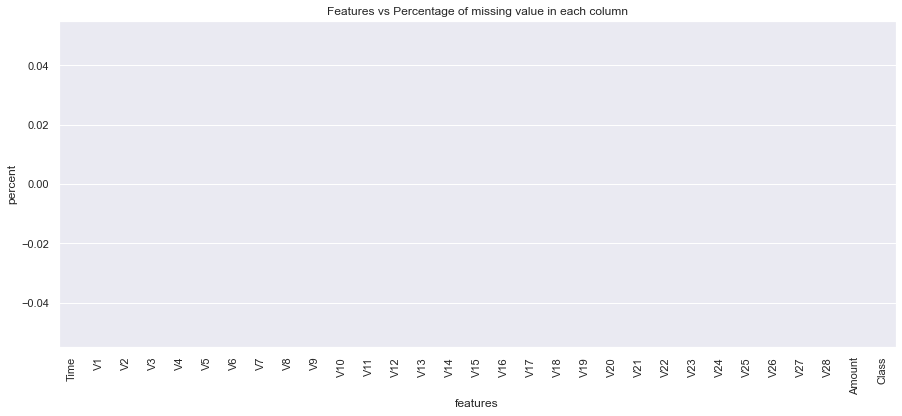

In [7]:
sns.set(rc={'figure.figsize':(15,6)});
plot_df = pd.DataFrame({'features':cols,'percent':percentage});
ax = sns.barplot(x='features',y ='percent',data=plot_df);
plt.xticks(rotation=90);
plt.title("Features vs Percentage of missing value in each column");

The above figure shows 0 percent missing values 

**We will now determine the class imbalance issue and the values of the labels**

In [8]:
# Your Code Here

fraud_transactions = raw_df[raw_df.Class==1]
non_fraud_transactions = raw_df[raw_df.Class==0]

In [9]:
print("Shape of the fraud transcations: ", len(fraud_transactions))
print("Shape of the non-fraud transcations: ",len(non_fraud_transactions))

Shape of the fraud transcations:  492
Shape of the non-fraud transcations:  284315


**Ans**: *There are **(284807, 31) observations** in this dataset, out of which **(492) are with the labels 1** and **(284315) are with labels 0**, which suggests that data is **highly imbalanced**
This also suggests that **492** are the fraudulent(positive) observations and the **284315** are the non-fradulent(negative) data observations*

In [10]:
non_fraud_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud_transactions.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### 1.2 Clean, split and normalize the data
The raw data has a few issues. First the `Time` and `Amount` columns are too variable to use directly. Drop the `Time` column (since it's not clear what it means) and take the log of the `Amount` column to reduce its range.

In [12]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**Q2. Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42.**

In [13]:
target = cleaned_df["Class"]
data = cleaned_df.drop(columns=["Class"])

In [14]:
# Your Code Here

from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, shuffle = True, random_state= 42)

In [15]:
print("Dev shape:",X_dev.shape)
print("Test shape:", X_test.shape)

Dev shape: (227845, 29)
Test shape: (56962, 29)


In [16]:
print("Dev Label shape:",y_dev.shape)
print("Test Label shape:", y_test.shape)

Dev Label shape: (227845,)
Test Label shape: (56962,)


**Q3. Normalize the input features using the sklearn StandardScaler. Print the shape of your development features and test features.**

In [17]:
### step 3 standardize in the feature matrices

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

###standardize the dataset 
###cite : https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn and https://www.kaggle.com/viswanathanc/auto-mpg-linear-regression
ta1 = X_dev.columns
ta2 = X_test.columns
std = StandardScaler()
X_dev[ta1] = std.fit_transform(X_dev[ta1])
X_test[ta2] = std.transform(X_test[ta2])

In [18]:
print("Dev shape:",X_dev.shape)
print("Test shape:", X_test.shape)
print("Dev Label shape:",y_dev.shape)
print("Test Label shape:", y_test.shape)

Dev shape: (227845, 29)
Test shape: (56962, 29)
Dev Label shape: (227845,)
Test Label shape: (56962,)


In [19]:
X_dev.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Ammount
223361,0.997851,-0.229626,-0.207385,0.234215,-0.367791,-0.064022,-0.505889,0.030604,0.959955,-0.026864,...,-0.162507,0.324839,1.336699,0.084569,-0.459802,-0.084368,-0.448942,0.112489,-0.143741,-0.316861
165061,-0.205221,-0.378220,1.027544,-1.424101,-0.078380,0.126364,0.013567,-0.337559,0.035913,0.563532,...,-0.608195,-0.209797,0.583086,0.180620,-1.658084,-2.253352,0.750588,-0.921898,-0.439841,0.437509
238186,0.036558,0.495563,-0.370033,-0.500363,0.777856,-0.268414,0.632710,0.098986,-0.120484,-0.586176,...,0.015283,-0.429767,-1.201892,0.132700,0.245102,-0.825048,0.248488,0.513730,0.212358,-0.226587
150562,-0.273682,0.612684,1.156521,1.957021,0.359664,0.750211,0.680997,-0.068094,0.337677,0.517041,...,-0.328347,0.086416,0.613043,-0.116294,0.740628,-1.253870,-0.374857,-0.231400,-0.197676,0.902285
138452,-2.056777,1.145573,-0.283165,-0.019856,-0.617403,-0.358912,-0.351206,1.105586,0.487524,1.125467,...,-0.016430,-0.656425,-0.315939,0.399524,0.110028,0.904176,0.508925,0.714090,-0.979240,0.151738


### 1.3 Define the model and metrics
**Q4. First, fit a default logistic regression model. Print the AUC and average precision of 5-fold cross validation.**

In [20]:
# Your Code Here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_dev,y_dev)
predsDev = model_lr.predict(X_dev)
predsTest = model_lr.predict(X_test)

In [21]:
test_score =  accuracy_score(y_test, predsTest)
dev_score = accuracy_score(y_dev, predsDev)
cm = confusion_matrix(y_test, predsTest)

In [22]:
print("Classification Score for LR on Dev dataset:\n")
print("Dev Score : ", dev_score)
print(classification_report(y_dev, predsDev))
print("--------------------------------------------------------")
print("Classification Score for LR on Test dataset:\n")
print("Test Score :", test_score)
print(classification_report(y_test, predsTest))

Classification Score for LR on Dev dataset:

Dev Score :  0.9992099892470758
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.63      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

--------------------------------------------------------
Classification Score for LR on Test dataset:

Test Score : 0.9991046662687406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
scores_lr = sklearn.model_selection.cross_validate(model_lr,X_dev,y_dev,cv=5,scoring=["roc_auc","average_precision"])
score_roc_lr = scores_lr["test_roc_auc"].mean()
score_avg_lr = scores_lr["test_average_precision"].mean()
print('ROC AUC Score: %.3f' % score_roc_lr)
print('Average Precision Score: %.3f' % score_avg_lr)

ROC AUC Score: 0.974
Average Precision Score: 0.761


In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
precision, recall, _ = metrics.precision_recall_curve(y_test, model_lr.predict_proba(X_test)[:,1])

**Q5.1. Perform random under sampling on the development set. What is the shape of your development features? How many  positive and negative labels are there in your development set? (Please set random state as 42 when performing random under sampling)**

In [25]:
# Your Code Here

##cite : https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

from collections import Counter

undersample = RandomUnderSampler(replacement=False, random_state=42)
pipeline_under = imb_make_pipeline(undersample,model_lr)
X_under, y_under = undersample.fit_resample(X_dev, y_dev)
print(Counter(y_under))
print("Dev shape:",X_dev.shape)
print("Dev Under shape:",X_under.shape)

Counter({0: 394, 1: 394})
Dev shape: (227845, 29)
Dev Under shape: (788, 29)


**Ans :** The ***development features*** have the shape of ***(788, 29)*** 

The positive labels are 394 

The negative labels are 394

**Q5.2. Fit a default logistic regression model using under sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random under sampling)**

In [26]:
# evaluate a linear regression model using k-fold cross-validation

scores_under = sklearn.model_selection.cross_validate(pipeline_under,X_dev,y_dev,cv=5, scoring=["roc_auc","average_precision"])
score_roc_under = scores_under["test_roc_auc"].mean()
score_avg_under = scores_under["test_average_precision"].mean()
print('AUC ROC Score: %.3f' % score_roc_under)
print('Average Precision Score: %.3f' % score_avg_under)

AUC ROC Score: 0.975
Average Precision Score: 0.639


In [27]:
pipeline_under.fit(X_dev,y_dev)
predsDev_under = pipeline_under.predict(X_dev)
predsTest_under = pipeline_under.predict(X_test)
test_score_under =  accuracy_score(y_test, predsTest_under)
dev_score_under = accuracy_score(y_dev, predsDev_under)
cm_under = confusion_matrix(y_test, predsTest_under)

In [28]:
print("Classification Score for LR Undersample on Dev dataset:\n")
print("Dev Score : ", dev_score_under)
print(classification_report(y_dev, predsDev_under))
print("--------------------------------------------------------")
print("Classification Score for LR Undersample on Test dataset:\n")
print("Test Score :", test_score_under)
print(classification_report(y_test, predsTest_under))

Classification Score for LR Undersample on Dev dataset:

Dev Score :  0.9585288244201101
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.93      0.07       394

    accuracy                           0.96    227845
   macro avg       0.52      0.94      0.53    227845
weighted avg       1.00      0.96      0.98    227845

--------------------------------------------------------
Classification Score for LR Undersample on Test dataset:

Test Score : 0.958814648362066
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [29]:
fpr_under, tpr_under, _ = metrics.roc_curve(y_test,pipeline_under.predict_proba(X_test)[:,1])
precision_under, recall_under, _ = metrics.precision_recall_curve(y_test, pipeline_under.predict_proba(X_test)[:,1])

**Q6.1. Perform random over sampling on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing random over sampling)**

In [30]:
# Your Code Here

oversample = RandomOverSampler(random_state=42)
pipeline_over = imb_make_pipeline(oversample,model_lr)
X_over, y_over = oversample.fit_resample(X_dev, y_dev)
print(Counter(y_over))
print("Dev shape:",X_dev.shape)
print("Dev Oversampled shape:", X_over.shape)

Counter({0: 227451, 1: 227451})
Dev shape: (227845, 29)
Dev Oversampled shape: (454902, 29)


**Ans :** The ***development features*** of the oversampled data have the shape of ***(454902, 29)*** 

The positive labels are  227451 (fraud)

The negative labels are 227451 (legit)

**Q6.2. Fit a default logistic regression model using over sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random over sampling)**

In [31]:
# Your Code Here

scores_over = sklearn.model_selection.cross_validate(pipeline_over,X_dev,y_dev,cv=5,scoring=["roc_auc","average_precision"])
score_roc_over = scores_over["test_roc_auc"].mean()
score_avg_over = scores_over["test_average_precision"].mean()
print('ROC AUC Score: %.3f' % score_roc_over)
print('Average Precision Score: %.3f' % score_avg_over)

ROC AUC Score: 0.977
Average Precision Score: 0.751


In [32]:
pipeline_over.fit(X_dev,y_dev)
predsDev_over = pipeline_over.predict(X_dev)
predsTest_over = pipeline_over.predict(X_test)
test_score_over =  accuracy_score(y_test, predsTest_over)
dev_score_over = accuracy_score(y_dev, predsDev_over)
cm_over = confusion_matrix(y_test, predsTest_over)

In [33]:
print("Classification Score for LR on Oversampled Dev dataset:\n")
print("Dev Score : ", dev_score_over)
print(classification_report(y_dev, predsDev_over))
print("--------------------------------------------------------")
print("Classification Score for LR on Oversampled Test dataset:\n")
print("Test Score :", test_score_over)
print(classification_report(y_test, predsTest_over))

Classification Score for LR on Oversampled Dev dataset:

Dev Score :  0.9757422809366016
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.92      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.98      0.99    227845

--------------------------------------------------------
Classification Score for LR on Oversampled Test dataset:

Test Score : 0.9754046557354026
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [34]:
fpr_over, tpr_over, _ = metrics.roc_curve(y_test,pipeline_over.predict_proba(X_test)[:,1])
precision_over, recall_over, _ = metrics.precision_recall_curve(y_test, pipeline_over.predict_proba(X_test)[:,1])

**Q7.1. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing SMOTE)**

In [35]:
# Your Code Here

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=3)
pipeline_smote = imb_make_pipeline(smote,model_lr)
X_smote_over,y_smote_over=smote.fit_resample(X_dev,y_dev)
print(Counter(y_smote_over))
print("Dev shape:",X_dev.shape)
print("Dev Oversampled shape for SMOTE:",X_smote_over.shape)

Counter({0: 227451, 1: 227451})
Dev shape: (227845, 29)
Dev Oversampled shape for SMOTE: (454902, 29)


**Ans :** The ***development features*** of the smote oversampled data have the shape of ***(454902, 29)*** 

The positive labels are  227451 (fraud)

The negative labels are 227451 (legit)

**Q7.2. Fit a default logistic regression model using SMOTE. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing SMOTE)**

In [36]:
# Your Code Here

scores_smote = sklearn.model_selection.cross_validate(pipeline_smote,X_dev,y_dev,cv=5, scoring=["roc_auc","average_precision"])
score_roc_smote = scores_smote["test_roc_auc"].mean()
score_avg_smote = scores_smote["test_average_precision"].mean()
print('ROC AUC Score: %.3f' % score_roc_smote)
print('Average Precision Score: %.3f' % score_avg_smote)

ROC AUC Score: 0.974
Average Precision Score: 0.751


In [37]:
pipeline_smote.fit(X_dev,y_dev)
predsDev_smote = pipeline_smote.predict(X_dev)
predsTest_smote = pipeline_smote.predict(X_test)
test_score_smote =  accuracy_score(y_test, predsTest_smote)
dev_score_smote = accuracy_score(y_dev, predsDev_smote)
cm_smote = confusion_matrix(y_test, predsTest_smote)

In [38]:
print("Classification Score for LR on Smote Dev dataset:\n")
print("Dev Score : ", dev_score_smote)
print(classification_report(y_dev, predsDev_smote))
print("--------------------------------------------------------")
print("Classification Score for LR on Smote Test dataset:\n")
print("Test Score :", test_score_smote)
print(classification_report(y_test, predsTest_smote))

Classification Score for LR on Smote Dev dataset:

Dev Score :  0.9743948737080033
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.91      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.94      0.55    227845
weighted avg       1.00      0.97      0.99    227845

--------------------------------------------------------
Classification Score for LR on Smote Test dataset:

Test Score : 0.9736139882728837
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [39]:
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,pipeline_smote.predict_proba(X_test)[:,1])
precision_smote, recall_smote, _ = metrics.precision_recall_curve(y_test, pipeline_smote.predict_proba(X_test)[:,1])

**Q8. Plot confusion matrices on the test set for all four models above. Comment on your result.**

In [40]:
print("Original Confusion Matrix:", cm)
print("Undersample Confusion Matrix:",cm_under)
print("Oversample Confusion Matrix:",cm_over)
print("Smote Confusion Matrix:", cm_smote)

Original Confusion Matrix: [[56855     9]
 [   42    56]]
Undersample Confusion Matrix: [[54526  2338]
 [    8    90]]
Oversample Confusion Matrix: [[55471  1393]
 [    8    90]]
Smote Confusion Matrix: [[55369  1495]
 [    8    90]]


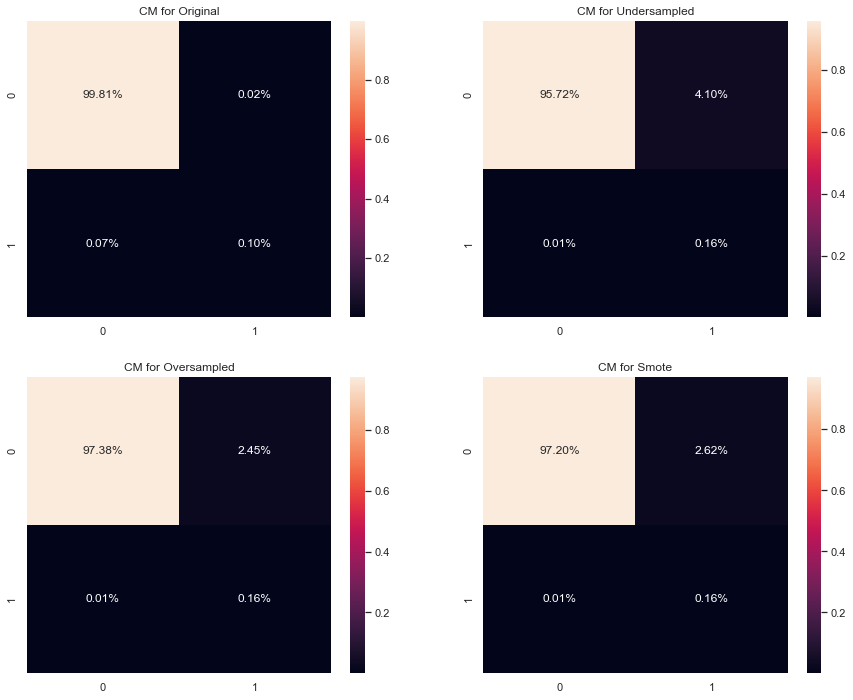

In [41]:
# Your Code Here

fig,ax = plt.subplots(2,2, figsize=(15,12));
ax = ax.ravel();
cm_list = [cm,cm_under,cm_over,cm_smote]
cm_label = ["Original","Undersampled","Oversampled","Smote"]
for i in range(0,len(cm_list)):
    sns.heatmap(cm_list[i]/np.sum(cm_list[i]),annot=True,fmt='0.2%',ax=ax[i]);
    ax[i].set_title("CM for " + cm_label[i]);
plt.show();
fig.suptitle('Comfusion Matrix for all 4 models');

**Ans:** As we check the various models here, we can see that all the models other than original has least FNs, but the SMOTE model has lesser FPs along with lesser FNs and better TNs as well, which makes it a better model than other models. 

**Q9. Plot the ROC for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

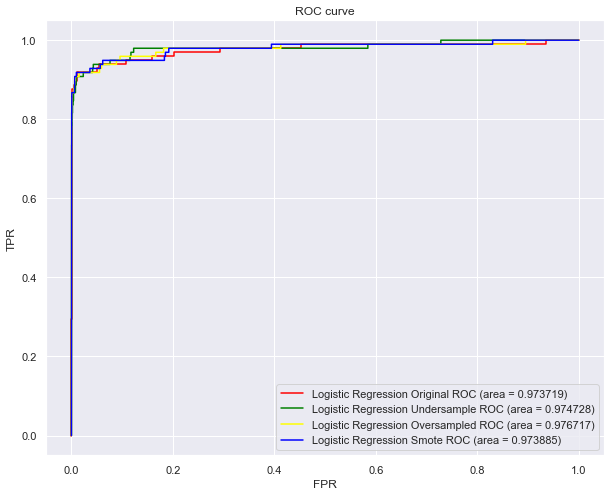

In [42]:
# Your Code Here

fig = plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, color='red', label='%s ROC (area = %f)' % ("Logistic Regression Original", score_roc_lr))
plt.plot(fpr_under,tpr_under, color='green', label='%s ROC (area = %f)' % ('Logistic Regression Undersample', score_roc_under))
plt.plot(fpr_over,tpr_over, color='yellow',  label='%s ROC (area = %f)' % ('Logistic Regression Oversampled', score_roc_over))
plt.plot(fpr_smote,tpr_smote, color='blue', label='%s ROC (area = %f)' % ('Logistic Regression Smote', score_roc_smote))
# title
plt.title('ROC curve')
# x label
plt.xlabel('FPR')
# y label
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show();

**Ans:** As we check the various models here, we can see that the best model is Oversampled here however, ideally smote should perform better, which can also be checked if we do not use inbuilt functions by sklearn, if we did not use pipeline the results differ

**Q10. Plot the precision-recall curve for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

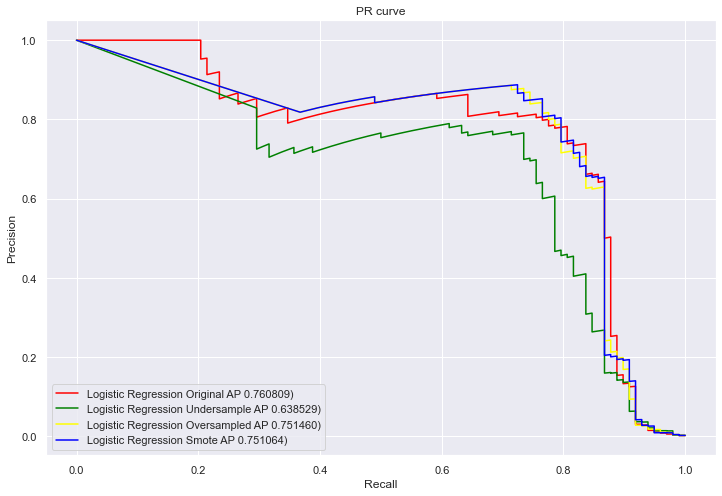

In [43]:
# Your Code Here

fig = plt.figure(figsize=(12,8))
plt.plot(recall, precision, color='red', label='%s AP %f)' % ("Logistic Regression Original", score_avg_lr))
plt.plot(recall_under, precision_under, color='green', label='%s AP %f)' % ('Logistic Regression Undersample', score_avg_under))
plt.plot(recall_over, precision_over, color='yellow',  label='%s AP %f)' % ('Logistic Regression Oversampled',score_avg_over))
plt.plot(recall_smote, precision_smote, color='blue', label='%s AP %f)' % ('Logistic Regression Smote',score_avg_smote))
# title
plt.title('PR curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show();

**Ans:** From the PR curve above we can see that the average precision for the SMOTE model is the best where both precision and recall are better, whereas the worst model is the undersampled one

**Q11. Adding class weights to a logistic regression model. Print the AUC and average precision of 5-fold cross validation. Also, plot its confusion matrix on test set.**

In [45]:
# Your Code Here

model_lr_weighted = LogisticRegression(class_weight="balanced", random_state=42)
model_lr_weighted.fit(X_dev,y_dev)

LogisticRegression(class_weight='balanced', random_state=42)

In [46]:
predsDev_weighted = model_lr_weighted.predict(X_dev)
predsTest_weighted = model_lr_weighted.predict(X_test)
cm_weighted = confusion_matrix(y_test, predsTest_weighted)
print("Original Confusion Matrix Weighted:\n", cm_weighted)

Original Confusion Matrix Weighted:
 [[55487  1377]
 [    8    90]]


In [47]:
scores_lr_weighted = sklearn.model_selection.cross_validate(model_lr_weighted,X_dev,y_dev,cv=5,scoring=["roc_auc","average_precision"])
score_roc_lr_weighted = scores_lr_weighted["test_roc_auc"].mean()
score_avg_lr_weighted = scores_lr_weighted["test_average_precision"].mean()
print('AUC ROC Score: %.3f' % score_roc_lr_weighted)
print('Average Precision Score: %.3f' % score_avg_lr_weighted)

AUC ROC Score: 0.977
Average Precision Score: 0.751


In [48]:
fpr_weighted, tpr_weighted, _ = metrics.roc_curve(y_test,model_lr_weighted.predict_proba(X_test)[:,1])
precision_weighted, recall_weighted, _ = metrics.precision_recall_curve(y_test, model_lr_weighted.predict_proba(X_test)[:,1])

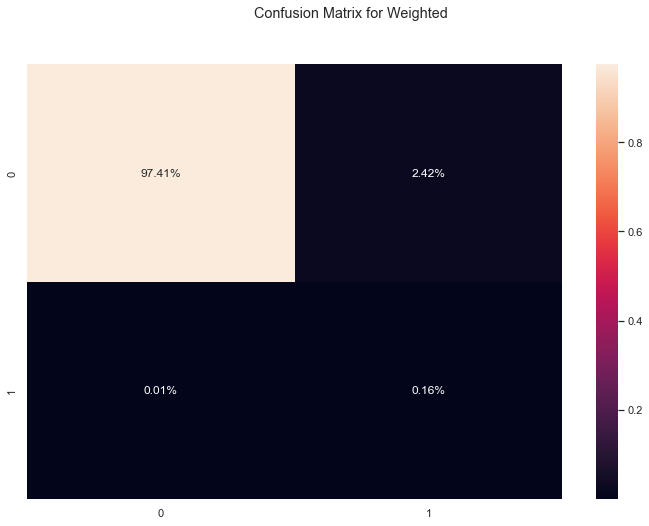

In [49]:
fig = plt.figure(figsize=(12,8));
sns.heatmap(cm_weighted/np.sum(cm_weighted),annot=True,fmt='0.2%');
fig.suptitle('Confusion Matrix for Weighted');

**Q12. Plot the ROC and the precision-recall curve for default Logistic without any sampling method and this balanced Logistic model in two single plots. Make sure to label the axes and legend. Comment on your result.**

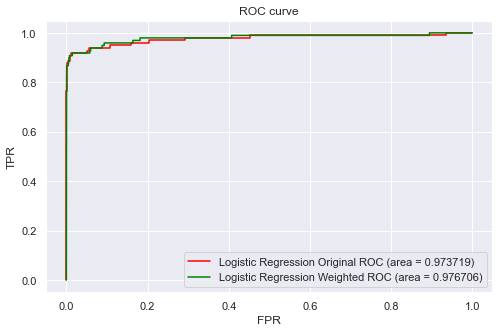

In [50]:
# Your Code Here

fig = plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, color='red', label='%s ROC (area = %f)' % ("Logistic Regression Original", score_roc_lr))
plt.plot(fpr_weighted,tpr_weighted, color='green', label='%s ROC (area = %f)' % ('Logistic Regression Weighted', score_roc_lr_weighted))
plt.title('ROC curve')
# x label
plt.xlabel('FPR')
# y label
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show();

**Ans:** As we can see from the above curve, the weighted model performs better with the best AUC

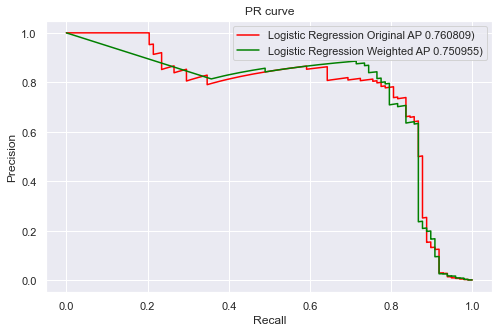

In [51]:
fig = plt.figure(figsize=(8,5))
plt.plot(recall, precision, color='red', label='%s AP %f)' % ("Logistic Regression Original",score_avg_lr))
plt.plot(recall_weighted, precision_weighted, color='green', label='%s AP %f)' % ('Logistic Regression Weighted',score_avg_lr_weighted))
# title
plt.title('PR curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show();

**Ans:** From the above curves we can see that weighted one has better precision and recall at the same time in comparison to the  original model, even though the AP of the original model is better, which could be due to the data imbalance. Hence we will consider weighted model.

## Part 2: Unsupervised Learning

In this part, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

### Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source is on Coursework.

In [52]:
cell_gene_counts_df = pd.read_csv('data/mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [53]:
cell_metadata_df = pd.read_csv('data/mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [54]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [55]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## 1 PCA

**Q1. Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [56]:
### Your code here

from sklearn.decomposition import PCA

# create the PCA instance
pca = PCA(n_components=50)
# fit on data
pca_data = pca.fit_transform(cell_gene_counts_df)
PCA_df= pd.DataFrame(data=pca_data)
# access values
print("PCA EXPLAINED VARIANCE RATIO: \n", pca.explained_variance_)
print("\nTOTAL PCA EXPLAINED VARIANCE RATIO: ", sum(pca.explained_variance_ratio_))

PCA EXPLAINED VARIANCE RATIO: 
 [778.70536017 606.41209355 367.08578266 268.39553916 245.07463156
 226.69492563 211.99142027 201.80456687 159.89439215 130.49529998
 124.66600694 112.73270009  95.01113292  82.77414993  72.18902513
  68.01424984  65.43653731  57.85021116  57.65795924  56.12678531
  52.17774341  51.12492215  49.70026209  48.74807376  48.24378374
  47.99320802  47.1130358   46.21993879  46.0354985   45.85005096
  44.91684836  44.53509146  43.74906519  43.5264076   43.2146192
  43.08265308  42.67933907  42.33265486  41.96667487  41.597746
  40.86001598  40.74032984  40.04992793  39.79999973  39.23545404
  38.83085647  38.30988306  37.3235726   36.66323387  36.2422252 ]

TOTAL PCA EXPLAINED VARIANCE RATIO:  0.27547465215466577


**Q2. Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

In [57]:
### Your code here

pca_ratio = np.cumsum(pca.explained_variance_ratio_)   
print(pca_ratio)

[0.0405364  0.07210387 0.09121294 0.10518458 0.11794222 0.12974308
 0.14077854 0.15128371 0.15960719 0.16640028 0.17288991 0.17875834
 0.18370425 0.18801315 0.19177104 0.19531159 0.19871797 0.20172943
 0.20473088 0.20765262 0.21036879 0.21303016 0.21561736 0.218155
 0.22066639 0.22316473 0.22561725 0.22802328 0.23041971 0.23280649
 0.23514469 0.23746301 0.23974042 0.24200624 0.24425582 0.24649854
 0.24872026 0.25092394 0.25310856 0.25527398 0.25740099 0.25952178
 0.26160662 0.26367846 0.2657209  0.26774229 0.26973655 0.27167948
 0.27358802 0.27547465]


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


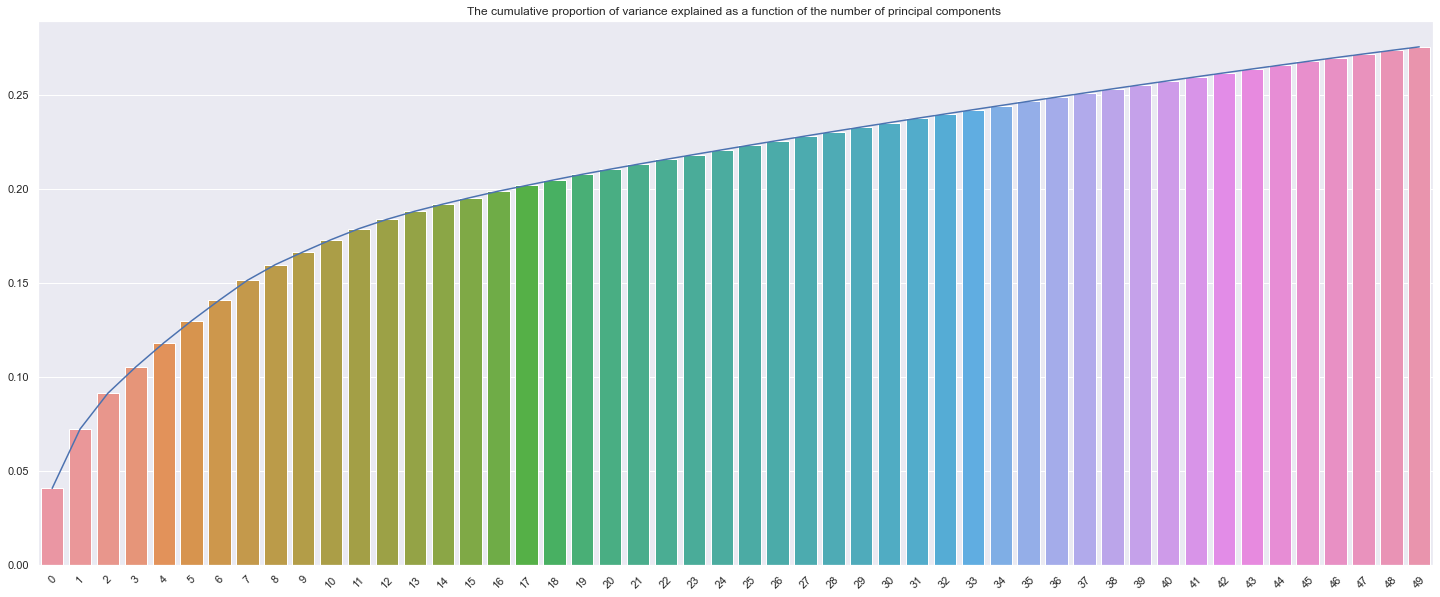

In [58]:
sns.set(rc={'figure.figsize':(25,10)});
components = [i for i in range(0,len(pca_ratio))];
plt.plot(components,pca_ratio)
sns.barplot(components,pca_ratio);
plt.xticks(rotation=45);
plt.title("The cumulative proportion of variance explained as a function of the number of principal components ");

In [59]:
print("the total variance in the dataset is explained by the first 20 principal components :", pca_ratio[19])

the total variance in the dataset is explained by the first 20 principal components : 0.207652622434548


**Q3. For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [60]:
### Your code here

weights = dict()
cols = cell_gene_counts_df.columns
for i,j in enumerate(cols):
    weights[j] = pca.components_[0][i]
weights = sorted(weights.items(), key=lambda item: item[1],reverse=True)

In [61]:
ten_loadings=[]
top_ten_genes=[]
for i in weights[:10]:
    ten_loadings.append(i)
    top_ten_genes.append(i[0])
print("The top 10 loadings (weights) and their corresponding gene names:\n", ten_loadings)
print("\nThe top 10 gene names: ",top_ten_genes)

The top 10 loadings (weights) and their corresponding gene names:
 [('Nsg2', 0.02667315589553402), ('St8sia3', 0.026594676050458444), ('Ptpn5', 0.026588009462154068), ('Kcnj4', 0.026539238170564045), ('Rasgef1a', 0.026347482125807044), ('Camkv', 0.02622075238033217), ('Hpca', 0.026173114004139842), ('Cpne5', 0.0260218494114234), ('Nrsn2', 0.02597897293590585), ('Erc2', 0.02585255864958827)]

The top 10 gene names:  ['Nsg2', 'St8sia3', 'Ptpn5', 'Kcnj4', 'Rasgef1a', 'Camkv', 'Hpca', 'Cpne5', 'Nrsn2', 'Erc2']


**Q4. Plot the projection of the data onto the first two principal components using a scatter plot.**

In [62]:
### Your code here

pca_2 = PCA(n_components=2)
pca_two = pca_2.fit_transform(cell_gene_counts_df)
pca_df = pd.DataFrame(data = pca_two, columns = ['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,15.353967,22.551432
1,-19.092789,-3.011178
2,1.624026,-26.093823
3,-15.469769,37.906454
4,-15.223272,-2.999143


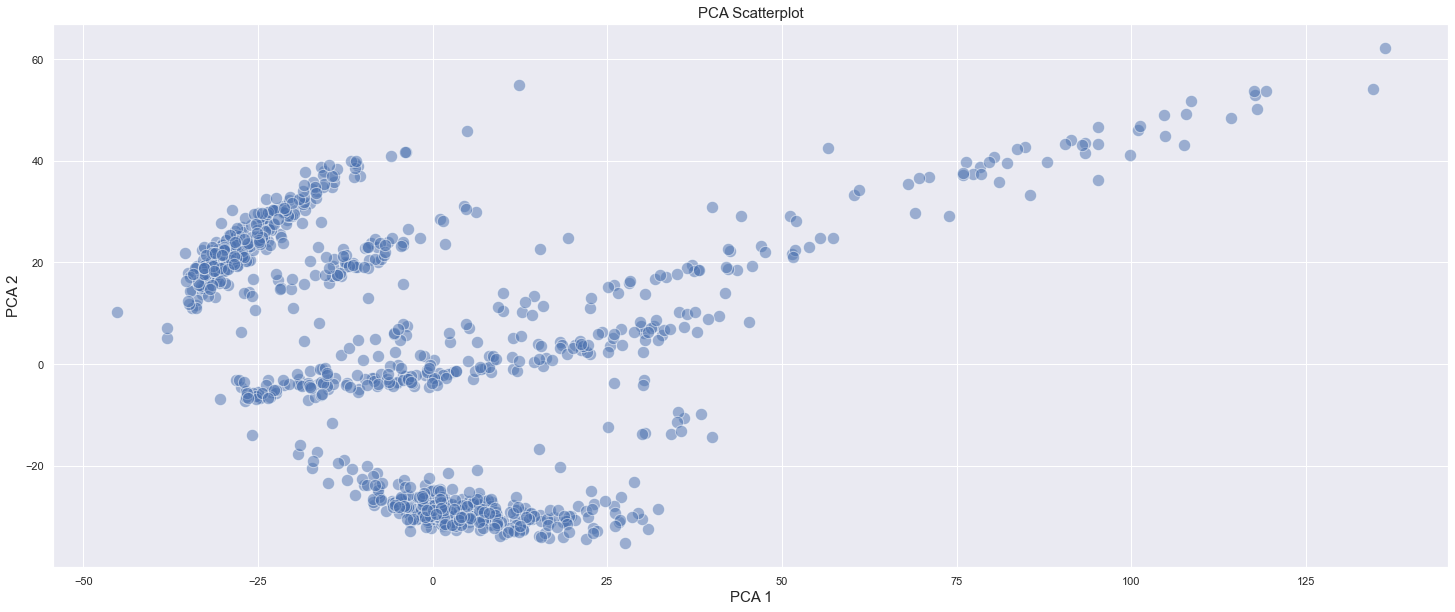

In [63]:
sns.scatterplot(x = "pca_1", y = "pca_2", data = pca_df, alpha = 0.5, s = 150);
plt.title('PCA for two components', fontsize = 12);
plt.xlabel("PCA 1", fontsize = 15);
plt.ylabel("PCA 2", fontsize = 15);
plt.title("PCA Scatterplot", fontsize = 15);

**Q5. Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

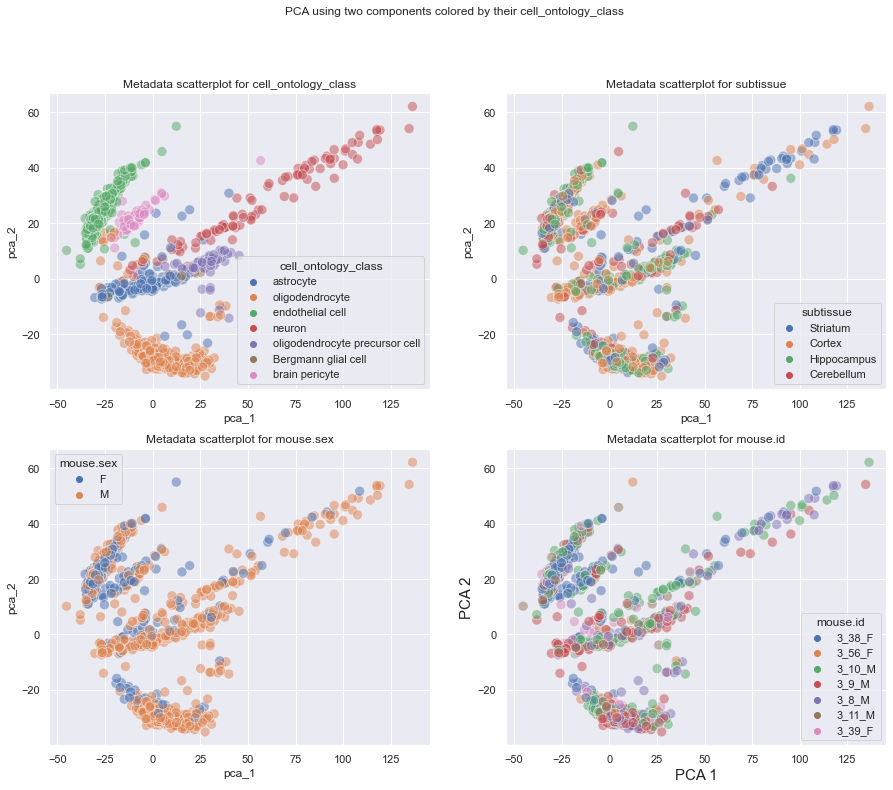

In [64]:
### Your code here
fig,ax = plt.subplots(2,2, figsize=(15,12));
ax = ax.ravel();
feature_list = ['cell_ontology_class','subtissue','mouse.sex','mouse.id']
for i in range(0,len(feature_list)):
    sns.scatterplot(x = "pca_1", y = "pca_2", data = pca_df, hue=cell_metadata_df[feature_list[i]], alpha = 0.5, s = 100, ax = ax[i]);
    ax[i].set_title("Metadata scatterplot for " + feature_list[i]);
plt.xlabel("PCA 1", fontsize = 15);
plt.ylabel("PCA 2", fontsize = 15);
plt.suptitle('PCA using two components colored by their cell_ontology_class', fontsize = 12);

**Q6. Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

In [65]:
### Your answer here

**Ans:** For PCA 1 and PCA 2, the 4 scatterplots show that only ***cell_ontology_class*** and ***mouse.sex*** are the only two features, which has the lowest overlap. Additonally, the only homogeneous distribution is only visible in ***cell_ontology_class***. Hence the first two principal components correspond to ***cell_ontology_class*** aspect of the cells. The intrinsic dimension is ***7*** whuch corresponds to different features like neuraons, brain pericyte, etc.

## 2 K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Q7. Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [66]:
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    ### Your code here
    
    ###cite : https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
    
    done = 1
    m = len(X)
    idx = np.random.choice(m,k,replace=False) ###choose random index for the centroid
    centroids = X[idx, :]
    y = np.zeros(X.shape[0])
    while done:
        for i, j in enumerate(X):
            min_d = float('inf')
            for idx,c in enumerate(centroids):
                d = np.sqrt((c[0]-j[0])**2 + (c[1]-j[1])**2)
                if min_d > d:
                    min_d = d
                    y[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=y).mean().values
        if np.count_nonzero(centroids-new_centroids) == 0:
            done = 0
        else:
            centroids = new_centroids
    return y

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

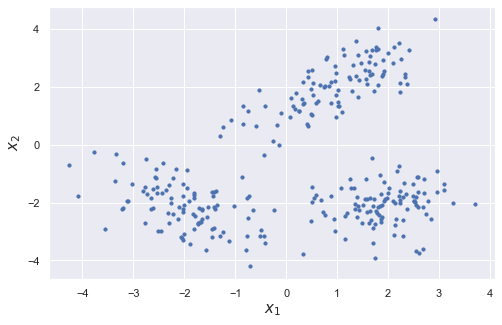

In [67]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Q8. Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

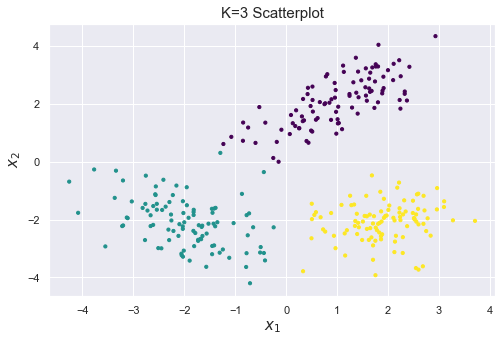

In [68]:
### Your code here

kmeans_3 = kmeans(X,k=3,iters=10);
plt.figure(figsize=(8, 5));
plt.scatter(X[:, 0], X[:, 1], s=10, c=kmeans_3, cmap='viridis');
plt.xlabel('$x_1$', fontsize=15);
plt.ylabel('$x_2$', fontsize=15);
plt.title("K=3 Scatterplot", fontsize = 15);

**Q9. Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

In [69]:
### Your code here
pca_20_df = pca_data[:,:20]
pca_20 = kmeans(pca_20_df,k=20,iters=10)
print("20 PCA Components:\n",pca_20)
print("20 PCA Components length:",len(pca_20))

20 PCA Components:
 [19.  0. 16. 17.  0.  0.  4.  1.  9.  2.  2.  3. 18.  3.  2.  8. 16. 16.
  9.  0.  9.  3. 13. 12. 14. 17.  3. 14.  9.  1.  0. 18. 17.  4. 14.  5.
  1. 11. 18. 16. 10. 14. 14.  9.  9. 11. 18.  8. 11.  0. 16.  9.  5. 16.
 17.  9. 16. 10. 11.  7. 16.  7. 12. 15.  7.  5. 18.  7.  4.  5.  2. 12.
  0.  2. 15. 16. 11. 13.  2.  0. 18.  5.  3. 11. 12.  0. 15. 12. 18.  1.
  2.  9. 16. 12. 16.  5. 16.  5. 14. 13.  9.  8.  8.  2.  5. 10.  8.  1.
  7. 18. 18.  5.  0.  2. 16.  2. 16. 14.  4. 16.  1.  3.  8.  7.  7.  3.
 19. 11.  3.  5. 16. 15.  6. 18. 12.  5. 16.  0. 10.  9. 14. 15.  6.  9.
 15.  6. 14.  4. 10. 14.  8.  0. 16.  7.  5.  3.  7. 14. 18. 16.  2. 18.
 14. 10. 15.  2.  3.  3. 18.  8. 14. 17.  9. 10. 18.  5.  5. 18.  0.  2.
 16.  8.  2.  0.  2.  4.  5. 16. 18.  3.  2. 10. 12.  0.  9.  9.  5. 10.
 16. 14.  8. 16. 16.  3. 16.  1. 16.  0. 16. 18. 16.  5.  0.  3. 10. 13.
  8.  2. 10. 16.  2.  9.  5.  4.  8. 18. 16. 18.  8. 16.  0. 10.  0. 15.
  2. 16. 16. 14.  2.  1.  9. 16

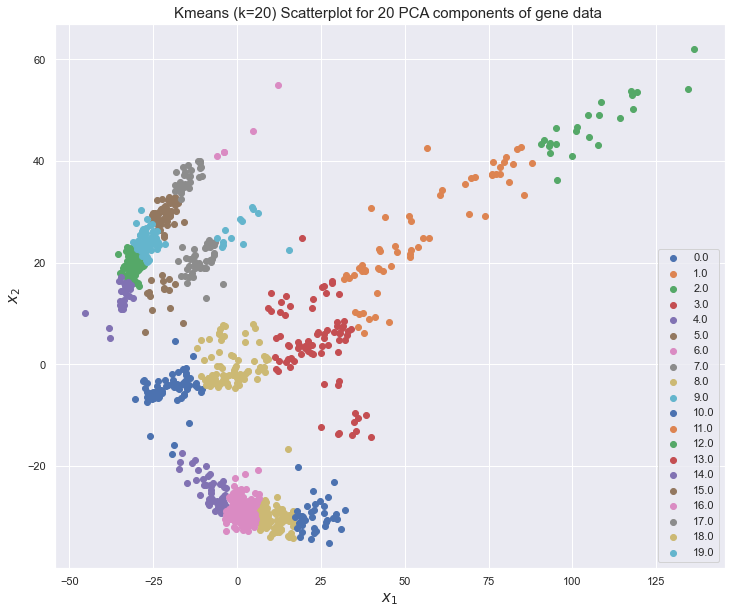

In [71]:
###cite : https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

plt.figure(figsize=(12, 10));
for i in np.unique(pca_20):
    ix = np.where(pca_20 == i)
    plt.scatter(pca_20_df[ix[0], 0], pca_20_df[ix[0], 1],label=i);
plt.legend( loc = 'best')
plt.xlabel('$x_1$', fontsize=15);
plt.ylabel('$x_2$', fontsize=15);
plt.title("Kmeans (k=20) Scatterplot for 20 PCA components of gene data ", fontsize = 15);

## 3 t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Q10. Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [72]:
### Your code here

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,verbose=0,learning_rate='auto',init='random')
pca_tsne = tsne.fit_transform(pca_20_df)

**Q11. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

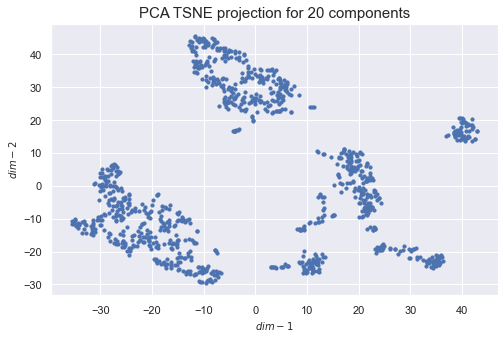

In [73]:
### Your code here

plt.figure(figsize=(8, 5));
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s=10, cmap='viridis');
plt.xlabel('$dim-1$', fontsize=10);
plt.ylabel('$dim-2$', fontsize=10);
plt.title("PCA TSNE projection for 20 components", fontsize = 15);

**Q12. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

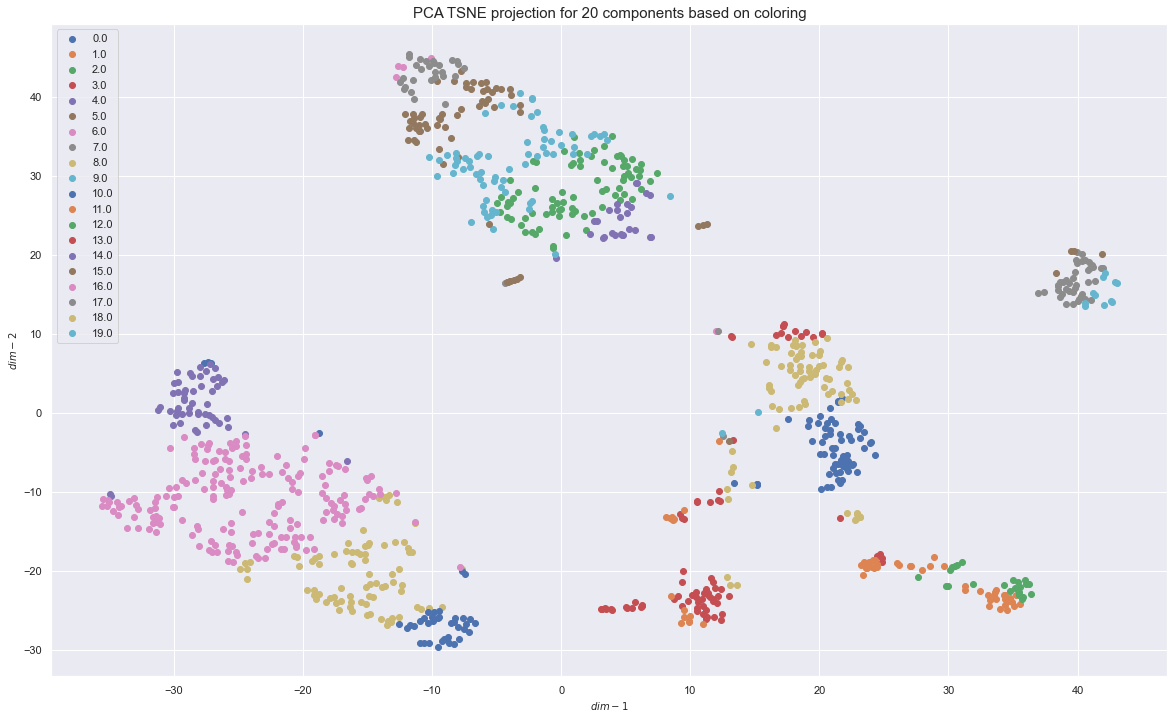

In [74]:
### Your code here

###cite : https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

plt.figure(figsize=(20, 12));
for i in np.unique(pca_20):
    ix = np.where(pca_20 == i)
    plt.scatter(pca_tsne[ix[0], 0], pca_tsne[ix[0], 1],label=i);
plt.legend( loc = 'best')
plt.xlabel('$dim-1$', fontsize=10);
plt.ylabel('$dim-2$', fontsize=10);
plt.title("PCA TSNE projection for 20 components based on coloring", fontsize = 15);

**Q13. Why is there overlap between points in different clusters in the t-SNE plot above?**

In [75]:
### Your answer here

**Ans:** t-SNE is not a very great visualization tool to demonstrate the multiple dimensions as it will try to project the high-dimensional data into the 2-d or 3-d format. As we can see, the above visualized plot has no clear distinction between the labels, which means they are overlapping. This is due to the fact that t-SNE has multiple parameters, which do not save the distances but only the nearest neighbors, hence missing out important information during projection of the high-dim data into low-dim, therefore unable to explain a lot of variance.

These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.